In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from graph import Graph, Node
import numpy as np

dist = np.array([[]])


In [3]:
dic_nodes = {}
edge_names = []

tab_name_V = ["Sprinkler", "Rain", "My_grass", "His_grass"]
for name_V in tab_name_V:
    node_V = Node(name_V, "V", nb_states=2)
    dic_nodes[name_V] = node_V

# By convention, small letters represent small variable ie. < 0.3
a, b, c, d, e, f, g, h = 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0, 0.1
# a, b, c, d, e, f, g, h = np.random.rand(8)

dist_list = [
    [[1-a, b],[a, 1-b]],
    [[1-c, d],[c, 1-d]],
    [[1-e, f],[e, 1-f]],
]

tab_dist_index = [
    ["My_grass", "Sprinkler"],
    ["My_grass", "Rain"],
    ["His_grass", "Rain"]
]

for dist, dist_index in zip(dist_list, tab_dist_index):
    dist = np.array(dist)
    first_letters = dist_index[1][0] + dist_index[0][0]
    name_F = f"F_{first_letters}"
    node_F = Node(name_F, "F", dist=dist, dist_index=dist_index)
    dic_nodes[name_F] = node_F
    edge_names.append((dist_index[1], name_F))
    edge_names.append((name_F, dist_index[0]))


# Priors on parents nodes
dist_list = [
    [g, 1-g],
    [1-h, h]
]

tab_dist_index = [
    ["Sprinkler"],
    ["Rain"]
]

for dist, dist_index in zip(dist_list, tab_dist_index):
    dist = np.array(dist)
    first_letter = dist_index[0][0]
    name_F = f"F_{first_letter}"
    node_F = Node(name_F, "F", dist=dist, dist_index=dist_index)
    dic_nodes[name_F] = node_F
    edge_names.append((name_F, dist_index[0]))


graph = Graph(dic_nodes, edge_names)

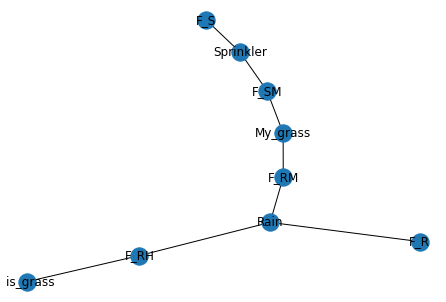

In [4]:
graph.plot()

In [8]:
def plot_proba(dic):
    return {key: [np.exp(log_proba) for log_proba in value] for key, value in dic.items()}
graph.belief_propagation()
plot_proba(graph.compute_belief_nodes())

6 (F_S -> Sprinkler)
7 (F_R -> Rain)
13 (His_grass -> F_RH)


{'Sprinkler': [0.49999999999999994, 0.49999999999999994],
 'Rain': [0.49999999999999994, 0.49999999999999994],
 'My_grass': [0.49999999999999994, 0.49999999999999994],
 'His_grass': [0.49999999999999994, 0.49999999999999994]}